##1.Pick one use case (defined below).

Predict stock market price for TESLA. I want you to make a prediction algorithm which predicts the price of this stock on a    specific date. Input will be date and output should be price of that stock (close value in the data file). You should also show the  prediction percentage score. Data file: TESLA.csv For updated csv file, please download the data from:         https://finance.yahoo.com/quote/TSLA/history?p=TSLA

##2.Explore and research which algorithm would work best for this use case (regression or classification)

Regression algorithms are mainly used to predict continuous valus such as price, salary, age, and classification algorithms is commonly used to  predict or classify discrete values such as true or false,  spam or not spam etc.

With this in mind, i think it's a nobrainer to go for a regression algorithm for this problem. 


##3.Document your findings in a file (3-5 lines) on why you chose this algorithm.




##4.Train the algorithm using Python


##5.Keep the solution as simple as possible. We are not looking for the best machine learning algorithm. We are interested in seeing that you know how to work with machine learning.


##6.Publish the code on GitHub and send us the link



In [35]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler as mms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [36]:
#First i save the url as a variable
url ='https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv'

#Reading the csv from the URL given above and telling python that the separator/delimiter is ','
df = pd.read_csv(url, sep=',')

#Showing the table
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [37]:
#Prediction precentage algorithm 

#precentage = (correct_predictions / number_of_predictions) * 100


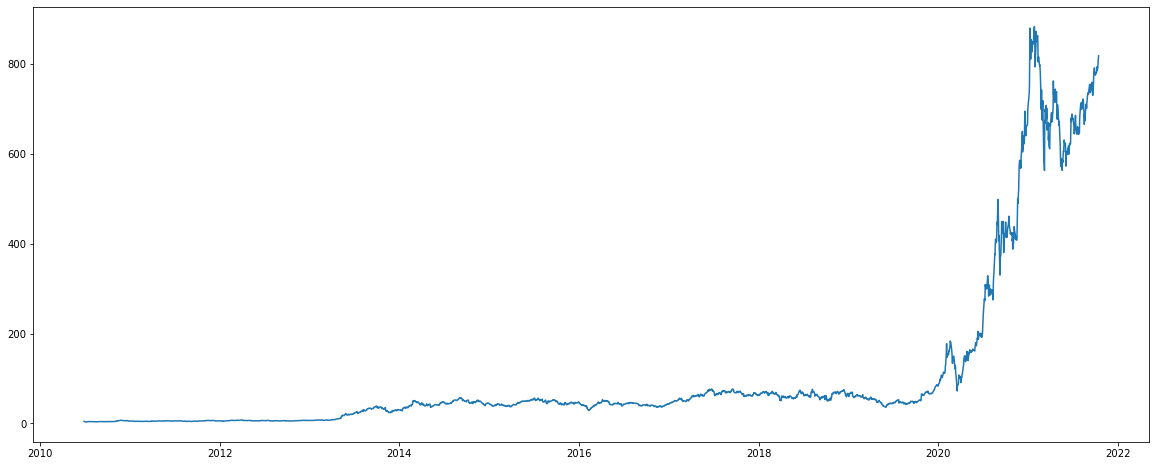

In [38]:
#Setting index as date

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#Plot
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label = 'Close price history')
#plt.plot(df['Open'], label = 'Open price history')

In [39]:
#Thoughts around the algorithm

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
2010-07-08,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
2010-07-09,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
2010-07-12,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500


Given the data i have i will try to use the 'open', 'high' and 'low' values to predict the 'close' value. 
f(x) = (open + high) - low = ? 
     = (3.8 + 5.0) - 3.508 
     = 8.8 - 3.508
     = 5.23

In [40]:
#Preparing the data with a scaler from the 'sklearn' library

scaler = mms(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 90

#Preparing two empty arrays

x_train = []
y_train = []

for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0 ])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [55]:
#Building a model

model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Prediction of the next closing value
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
87/87 [==============================] - 14s 113ms/step - loss: 0.0053
Epoch 2/100
87/87 [==============================] - 11s 130ms/step - loss: 0.0018
Epoch 3/100
87/87 [==============================] - 13s 150ms/step - loss: 0.0012
Epoch 4/100
87/87 [==============================] - 12s 138ms/step - loss: 0.0010
Epoch 5/100
87/87 [==============================] - 11s 132ms/step - loss: 0.0010
Epoch 6/100
87/87 [==============================] - 12s 134ms/step - loss: 0.0012
Epoch 7/100
87/87 [==============================] - 11s 131ms/step - loss: 9.7951e-04
Epoch 8/100
87/87 [==============================] - 12s 139ms/step - loss: 0.0011
Epoch 9/100
87/87 [==============================] - 13s 155ms/step - loss: 8.8362e-04
Epoch 10/100
87/87 [==============================] - 13s 151ms/step - loss: 8.6521e-04
Epoch 11/100
87/87 [==============================] - 13s 146ms/step - loss: 9.0451e-04
Epoch 12/100
87/87 [==============================] - 11s 126ms/step 

In [42]:
#Loading test data
test_sart = dt.datetime(2010,6,29)
test_end = dt.datetime(2021,10,14)

test_data = df
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

#Making predictions on test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days : x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


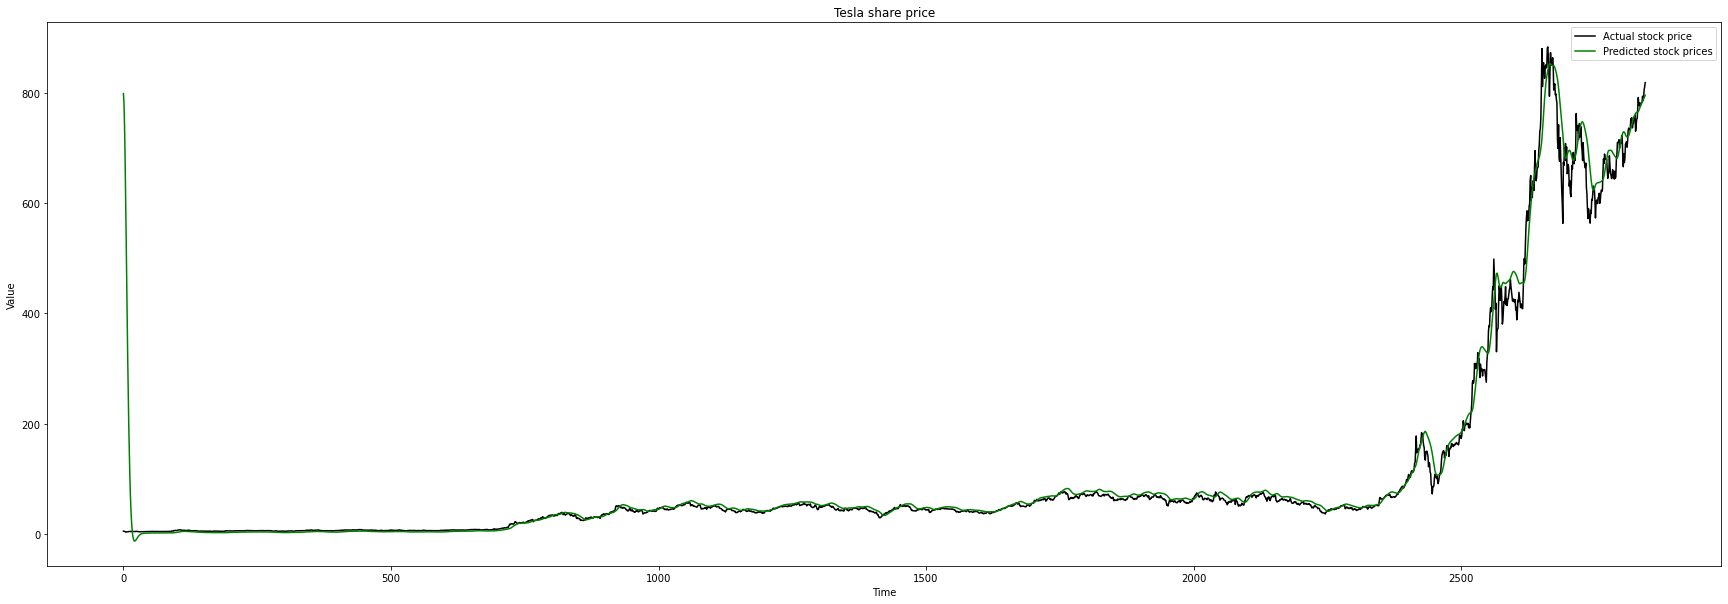

In [43]:
#Ploting the predictions


plt.plot(actual_prices, color="black", label="Actual stock price")
plt.plot(predicted_prices, color="green", label = "Predicted stock prices")
plt.title("Tesla share price")
plt.xlabel("Time")
plt.ylabel("Value")
plt.rcParams["figure.figsize"] = (30,10)
plt.legend()
plt.show()

In [54]:
correct_predictions = 0
incorrect_predictions = 0

for i in range (len(x_test)):
    if predicted_prices[i] == actual_prices[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

print(correct_predictions)
print(incorrect_predictions)

0
2845
